# Covid-19 Virus Data Prediction

<div>
<img src="https://cdn.pixabay.com/photo/2020/03/09/14/11/virus-4915859_1280.png" width="800" height="300"/>
</div>

## Author : Shashank Raj


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv')
train.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16951 entries, 0 to 16950
Data columns (total 8 columns):
Date              16951 non-null object
Country/Region    16951 non-null object
Province/State    5293 non-null object
Lat               16951 non-null float64
Long              16951 non-null float64
Confirmed         16884 non-null float64
Recovered         16013 non-null float64
Deaths            16884 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.0+ MB


In [0]:
train.rename(columns = {"Province/State": "state", "Country/Region":"country"}, inplace = True) 

In [0]:
train.drop('Lat', axis = 1, inplace = True)
train.drop('Long', axis = 1, inplace = True)
train.drop('Recovered', axis = 1, inplace = True)

# Dealing with NaN values and changing them to "Not Available"

In [6]:
train.isnull().sum()

Date             0
country          0
state        11658
Confirmed       67
Deaths          67
dtype: int64

In [0]:

train.state = train.state.fillna('Not Available')

In [8]:
train.isnull().sum()

Date          0
country       0
state         0
Confirmed    67
Deaths       67
dtype: int64

#Creating a dataframe with latest data
##We group all countries together and remove the provinces altogether to get the latest aggregate count of victims.  

In [9]:
train_new = train[train.Date == train.Date.max()].groupby(by='country')
train_new = train_new.aggregate(np.sum)
train_new.reset_index(level=0, inplace=True)
train_new.head()

,country,Confirmed,Deaths
0,Afghanistan,110.0,4.0
1,Albania,197.0,10.0
2,Algeria,454.0,29.0
3,Andorra,308.0,3.0
4,Angola,5.0,0.0


In [10]:
#check if the new data has correct values for countries that initially had provinces.
train_new[train_new.country == 'US']


,country,Confirmed,Deaths
165,US,121478.0,2026.0


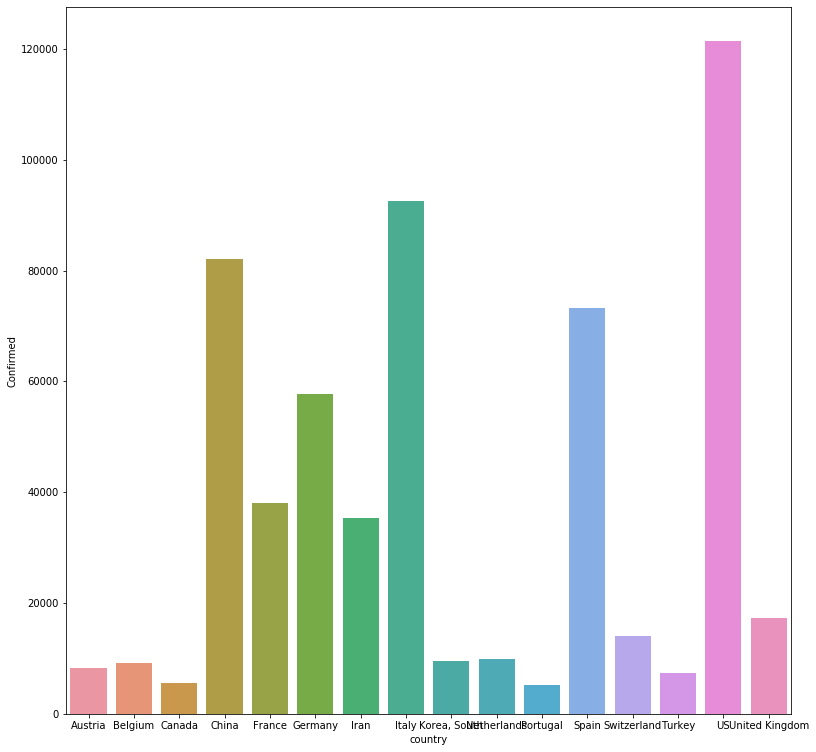

In [11]:
plt.figure(figsize=(13,13))
sns.barplot(x = 'country', y = 'Confirmed', data = train_new[train_new.Confirmed > 5000])

# Change of plans
## Lets group by on the basis of date

In [12]:
train_n2 = train.drop(['state'],axis=1)
train_n2.head()

,Date,country,Confirmed,Deaths
0,2020-01-22,Afghanistan,0.0,0.0
1,2020-01-23,Afghanistan,0.0,0.0
2,2020-01-24,Afghanistan,0.0,0.0
3,2020-01-25,Afghanistan,0.0,0.0
4,2020-01-26,Afghanistan,0.0,0.0


In [13]:
train_n2.sort_values('Date').reset_index().drop('index', axis =1)

,Date,country,Confirmed,Deaths
0,2020-01-22,Afghanistan,0.0,0.0
1,2020-01-22,Bhutan,0.0,0.0
2,2020-01-22,Australia,0.0,0.0
3,2020-01-22,United Kingdom,0.0,0.0
4,2020-01-22,Canada,0.0,0.0
...,...,...,...,...
16946,2020-03-28,Fiji,5.0,0.0
16947,2020-03-28,Congo (Brazzaville),4.0,0.0
16948,2020-03-28,Lithuania,394.0,7.0
16949,2020-03-28,France,28.0,0.0


In [14]:
train_n2.groupby('Date')[['Confirmed','country','Deaths']].sum().reset_index()

,Date,Confirmed,Deaths
0,2020-01-22,555.0,17.0
1,2020-01-23,654.0,18.0
2,2020-01-24,941.0,26.0
3,2020-01-25,1434.0,42.0
4,2020-01-26,2118.0,56.0
...,...,...,...
62,2020-03-24,418045.0,18625.0
63,2020-03-25,467653.0,21181.0
64,2020-03-26,529591.0,23970.0
65,2020-03-27,593291.0,27198.0


# Prediction for India only

In [0]:
train_ind = train_n2.loc[train_n2['country']=='India'].copy()


In [16]:
train_ind['Date'] = pd.to_datetime(train_ind['Date'])
train_ind = train_ind.set_index('Date')
train_ind.head()


,country,Confirmed,Deaths
Date,,,
2020-01-22,India,0.0,0.0
2020-01-23,India,0.0,0.0
2020-01-24,India,0.0,0.0
2020-01-25,India,0.0,0.0
2020-01-26,India,0.0,0.0


# For Confirmed Cases

In [17]:
train_ind2 = train_ind.drop(['country','Deaths'],axis = 1)
train_ind2 = train_ind2.loc[train_ind2['Confirmed']>0]
train_ind3 = train_ind2
train_ind2.head()

,Confirmed
Date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,1.0
2020-02-02,2.0
2020-02-03,3.0


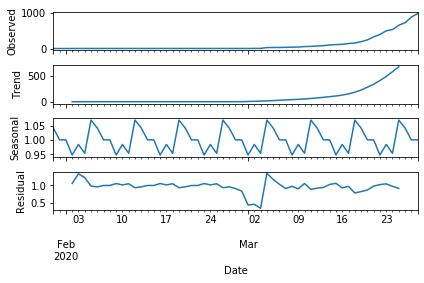

In [18]:
pd.plotting.register_matplotlib_converters()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_ind2, model='multiplicative')
result.plot()
plt.show()

In [19]:
new_colname = 'y'
train_ind2.index.rename('ds', inplace=True)
train_ind2.rename(columns = {'Confirmed' : 'y'},inplace=True)
train_ind2.reset_index(level=0, inplace=True)
train_ind2.head()

,ds,y
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


# Predicting using facebook Prophet
## Since there is no daily seasonality, we make it false while other values true to get the final prediction. Prophet takes care of rest of the algorithms and values internally.

In [20]:
from fbprophet import Prophet

# instantiate the model and set parameters
model = Prophet(
    interval_width=0.95,
    holidays = pd.DataFrame({'holiday': 'lockdown','ds': pd.to_datetime(['2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-28','2020-03-29','2020-03-30','2020-03-31','2020-04-01'
    ,'2020-04-02','2020-04-03','2020-04-04','2020-04-05','2020-04-05','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-10','2020-04-11','2020-04-12','2020-04-13','2020-04-14'])}),
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)

# fit the model to historical data

model.fit(train_ind2)

In [0]:
future_pd = model.make_future_dataframe(
    periods=60,
    freq='d',
    include_history=True
)

# predict over the dataset
forecast_pd = model.predict(future_pd)

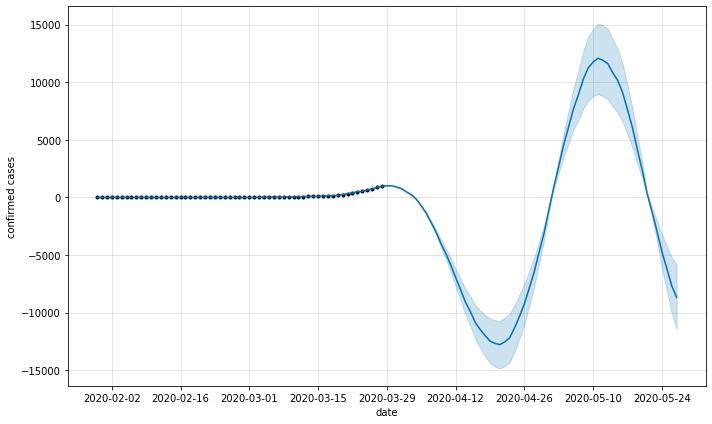

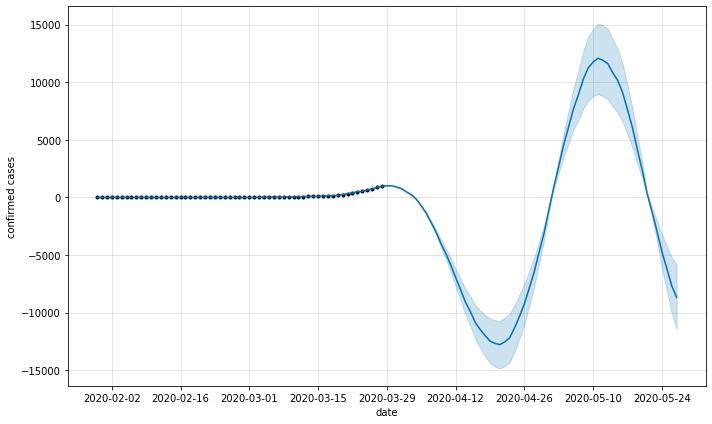

In [22]:
predict_fig = model.plot(forecast_pd, xlabel='date', ylabel='confirmed cases')
display(predict_fig)

In [23]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(model, forecast_pd)  # This returns a plotly Figure
py.iplot(fig)

In [24]:
forecast_pd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[55:63]


,ds,yhat,yhat_lower,yhat_upper
55,2020-03-25,653.350051,647.113207,659.326819
56,2020-03-26,731.945588,725.912934,737.483528
57,2020-03-27,882.912135,877.370487,888.530004
58,2020-03-28,988.424589,982.709976,994.122175
59,2020-03-29,1009.555767,1002.861531,1016.312916
60,2020-03-30,1013.013430,1002.329750,1023.694449
61,2020-03-31,897.117518,882.694538,911.797158
62,2020-04-01,759.641225,741.029067,777.599128


In [0]:
fpd = pd.DataFrame(forecast_pd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [0]:
fpd.rename(columns= {'ds':'Date', 'yhat':'Predicted Cases'},inplace=True)

In [0]:
fpd.drop(['yhat_lower','yhat_upper'],axis=1,inplace=True)

## Predicted Cases for upcoming days

In [28]:
fpd[(fpd['Date']>= '2020-03-30') & (fpd['Date']<= '2020-03-31')]

,Date,Predicted Cases
60,2020-03-30,1013.013430
61,2020-03-31,897.117518


##Highest Number of Predicted Cases

In [29]:
print("Date: ",fpd.sort_values(by = 'Predicted Cases',ascending=False).iloc[1].Date.date(), "\n","Highest Predicted:",round(fpd.sort_values(by = 'Predicted Cases',ascending=False).iloc[1]['Predicted Cases']))

Date:  2020-05-12 
 Highest Predicted: 11900.0


# Countries With Most Number of Cases for the upcoming days

In [30]:
train.head()

,Date,country,state,Confirmed,Deaths
0,2020-01-22,Afghanistan,Not Available,0.0,0.0
1,2020-01-23,Afghanistan,Not Available,0.0,0.0
2,2020-01-24,Afghanistan,Not Available,0.0,0.0
3,2020-01-25,Afghanistan,Not Available,0.0,0.0
4,2020-01-26,Afghanistan,Not Available,0.0,0.0


## Combine Provinces/States for:
### 'Austrailia' 'Canada' 'China' 'Cruise Ship' 'Denmark' 'France' 'Netherlands' 'US' 'United Kingdom'

In [0]:
c_list = ['Austrailia', 'Canada', 'Cruise Ship', 'Denmark', 'France', 'Netherlands', 'US', 'United Kingdom']

In [32]:
#create a copy df for train_n2 and delete the above listed countries from the list AND China
train_ctry = train_n2.copy() 
for clst in c_list:
  train_ctry.drop(train_ctry[train_ctry['country'] == clst].index, inplace = True)
train_ctry.drop(train_ctry[train_ctry['country'] == 'China'].index, inplace = True)
train_ctry.head()

,Date,country,Confirmed,Deaths
0,2020-01-22,Afghanistan,0.0,0.0
1,2020-01-23,Afghanistan,0.0,0.0
2,2020-01-24,Afghanistan,0.0,0.0
3,2020-01-25,Afghanistan,0.0,0.0
4,2020-01-26,Afghanistan,0.0,0.0


In [33]:
train_n2.country.unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea-Bissau', 'Guinea', 'Guyana', 'H

In [34]:
#Creating a dataframe with combined data 
train_ch = train_n2[train_n2['country']=='China'].groupby('Date').aggregate(np.sum).reset_index()
train_ch['country'] = 'China'
for obj in c_list:
  train_temp = train_n2[train_n2['country']==obj].groupby('Date').aggregate(np.sum).reset_index()
  train_temp['country'] = obj
  train_ch = train_ch.append(train_temp)

train_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 66
Data columns (total 4 columns):
Date         469 non-null object
Confirmed    469 non-null float64
Deaths       469 non-null float64
country      469 non-null object
dtypes: float64(2), object(2)
memory usage: 18.3+ KB


In [35]:
train_ctry = train_ctry.append(train_ch,sort=True).copy()
train_ctry[train_ctry.country=='China']

,Confirmed,Date,Deaths,country
0,548.0,2020-01-22,17.0,China
1,643.0,2020-01-23,18.0,China
2,920.0,2020-01-24,26.0,China
3,1406.0,2020-01-25,42.0,China
4,2075.0,2020-01-26,56.0,China
...,...,...,...,...
62,81591.0,2020-03-24,3281.0,China
63,81661.0,2020-03-25,3285.0,China
64,81782.0,2020-03-26,3291.0,China
65,81897.0,2020-03-27,3296.0,China


In [36]:
train_ctry.head()

,Confirmed,Date,Deaths,country
0,0.0,2020-01-22,0.0,Afghanistan
1,0.0,2020-01-23,0.0,Afghanistan
2,0.0,2020-01-24,0.0,Afghanistan
3,0.0,2020-01-25,0.0,Afghanistan
4,0.0,2020-01-26,0.0,Afghanistan


In [47]:
train_ctry2 = pd.DataFrame()
#choose countries
choose_list = ['US','Italy','Spain','Germany','France','Iran','UK','Switzerland','Netherland']

for clist in choose_list:
  train_ctry2 = train_ctry2.append(train_ctry[train_ctry.country==clist]).copy()

train_ctry2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 14940
Data columns (total 4 columns):
Confirmed    1876 non-null float64
Date         1876 non-null object
Deaths       1876 non-null float64
country      1876 non-null object
dtypes: float64(2), object(2)
memory usage: 73.3+ KB


,Confirmed,Date,Deaths,country


In [52]:
total_countries = train_ctry2.country.unique().tolist()
total_countries

['US', 'Italy', 'Spain', 'Germany', 'France', 'Iran', 'Switzerland']

##Choosing the top effected countries

In [53]:
final_top = pd.DataFrame()
final_top_df = pd.DataFrame()
for country in total_countries:
  
  train_fin = train_ctry.loc[train_ctry['country']==country].copy()
  train_fin.drop(['country','Deaths'],axis = 1,inplace = True)
  train_fin['Date'] = pd.to_datetime(train_fin['Date'])
  train_fin = train_fin.set_index('Date') 
  train_fin2 = train_fin.loc[train_fin['Confirmed']>0].copy()
  train_fin2.index.rename('ds', inplace=True)
  train_fin2.rename(columns = {'Confirmed' : 'y'},inplace=True)
  train_fin2.reset_index(level=0, inplace=True)
  # instantiate the model and set parameters
  model = Prophet(
    interval_width=0.95,
    growth='linear',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
  )
  model.fit(train_fin2)
  forecast_pdf = model.predict(future_pd)
  print('Country: ' +country )
  print(forecast_pdf[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][(forecast_pdf['ds']>= '2020-03-24') & (forecast_pdf['ds']<= '2020-03-31')])
  tmp_df = forecast_pdf[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][(forecast_pdf['ds']>= '2020-03-24') & (forecast_pdf['ds']<= '2020-03-31')]
  tmp_df['country'] = country
  print('Maximum Predicted: ')
  print(forecast_pdf.sort_values(by = 'yhat',ascending=False).iloc[1][['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
  train_final_countries_tmp = pd.DataFrame({'Date':forecast_pdf.ds ,'country':country, 'Highest Prediction':forecast_pdf.sort_values(by = 'yhat',ascending=False).iloc[1]['yhat']},index = [0])
  print(train_final_countries_tmp)
  final_top = final_top.append(train_final_countries_tmp)
  final_top_df = final_top_df.append(tmp_df)

Country: US
           ds           yhat     yhat_lower     yhat_upper
54 2020-03-24   53761.472302   53476.746405   54028.268886
55 2020-03-25   65595.179997   65330.790849   65857.034317
56 2020-03-26   84038.683842   83754.686601   84326.049709
57 2020-03-27  101871.058201  101596.906442  102138.467964
58 2020-03-28  121266.813806  120991.795969  121528.045819
59 2020-03-29  138921.650138  138536.578984  139401.872781
Maximum Predicted: 
ds            2020-04-07 00:00:00
yhat                       262361
yhat_lower                 248398
yhat_upper                 278871
Name: 68, dtype: object
        Date country  Highest Prediction
0 2020-01-30      US        262361.41442
Country: Italy
           ds          yhat    yhat_lower    yhat_upper
54 2020-03-24  69138.570091  68706.153634  69554.737411
55 2020-03-25  74678.615792  74242.292076  75148.395597
56 2020-03-26  80140.896706  79687.272193  80606.135882
57 2020-03-27  86685.108193  86272.803897  87144.087795
58 2020-03-28  924

In [54]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
final_top.sort_values('Highest Prediction', ascending=False).reset_index()

,index,Date,country,Highest Prediction
0,0,2020-01-30,US,262361.414
1,0,2020-01-30,Germany,221773.866
2,0,2020-01-30,Spain,176486.037
3,0,2020-01-30,Iran,102323.082
4,0,2020-01-30,Italy,101183.928
5,0,2020-01-30,France,99748.171
6,0,2020-01-30,Switzerland,23645.025


## Top 5 countries with highest upcoming Covid-19 cases.
### Italy to be effected most


In [55]:
final_top.sort_values('Highest Prediction', ascending=False).reset_index().head()

,index,Date,country,Highest Prediction
0,0,2020-01-30,US,262361.414
1,0,2020-01-30,Germany,221773.866
2,0,2020-01-30,Spain,176486.037
3,0,2020-01-30,Iran,102323.082
4,0,2020-01-30,Italy,101183.928


# Downloading the file

In [0]:
from google.colab import files
final_top_df.to_csv('Predicted Effected.csv')
files.download('Predicted Effected.csv')